<a href="https://colab.research.google.com/github/Shamsul0007/Disaster-Impact-Analysis-Prediction/blob/main/Disaster_Impact_Analysis_%26_Impact_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("/content/disaster_dataset.csv")
df.head()

,Disaster_ID,Disaster_Type,Region,Year,Severity_Level,Magnitude_or_Intensity,Economic_Loss_USD_Million,Fatalities,Affected_Population
0,1,Wildfire,Asia,1987,Moderate,4.32,1995.35,23,414850
1,2,Tornado,Asia,2004,Severe,4.33,4139.49,25,877802
2,3,Hurricane,Asia,1983,Low,1.47,861.83,15,494749
3,4,Tornado,Asia,2012,Severe,7.91,162.01,21,164044
4,5,Tornado,Africa,1980,Severe,4.75,1030.20,23,499053


In [5]:
summary= df.describe()


In [6]:
summary

,Disaster_ID,Year,Magnitude_or_Intensity,Economic_Loss_USD_Million,Fatalities,Affected_Population
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2001.668000,5.482890,2459.391680,19.812000,525247.196000
std,288.819436,12.899542,2.591917,1428.583814,4.551414,293084.473948
min,1.000000,1980.000000,1.000000,10.150000,8.000000,137.000000
25%,250.750000,1990.000000,3.237500,1210.775000,17.000000,273694.750000
50%,500.500000,2001.000000,5.495000,2468.460000,20.000000,524678.000000
75%,750.250000,2013.000000,7.742500,3660.132500,23.000000,784404.250000
max,1000.000000,2024.000000,10.000000,4988.770000,33.000000,999290.000000


Data Cleaning

In [7]:
##Step 2: Data Cleaning

## Handle missing values
print("\nHandling missing values...")

# Check percentage of missing values
missing_percent = df.isnull().mean() * 100
print("Missing value percentage:")
print(missing_percent)



Handling missing values...
Missing value percentage:
Disaster_ID                  0.0
Disaster_Type                0.0
Region                       0.0
Year                         0.0
Severity_Level               0.0
Magnitude_or_Intensity       0.0
Economic_Loss_USD_Million    0.0
Fatalities                   0.0
Affected_Population          0.0
dtype: float64


In [8]:
## Handle duplicate entries
print("\nChecking for duplicates...")
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicates} duplicates")



Checking for duplicates...
Found 0 duplicate rows


In [9]:
# Convert categorical columns
df['Disaster_Type'] = df['Disaster_Type'].astype('category')
df['Region'] = df['Region'].astype('category')

# Convert Severity_Level with proper ordering
severity_order = ['Low', 'Moderate', 'High', 'Severe']
df['Severity_Level'] = pd.Categorical(
    df['Severity_Level'],
    categories=severity_order,
    ordered=True
)

# Verify the conversions
print("\nData types after conversion:")
print(df.dtypes)

# Verify Severity_Level ordering works
print("\nSample severity comparison:")
print("Is High > Moderate?", df['Severity_Level'][0] > df['Severity_Level'][1])


Data types after conversion:
Disaster_ID                     int64
Disaster_Type                category
Region                       category
Year                            int64
Severity_Level               category
Magnitude_or_Intensity        float64
Economic_Loss_USD_Million     float64
Fatalities                      int64
Affected_Population             int64
dtype: object

Sample severity comparison:
Is High > Moderate? False


Basic Statistics

In [10]:
# Group by Disaster_Type and Region, calculating mean for specified columns
grouped_df = df.groupby(['Disaster_Type', 'Region'])[
    ['Economic_Loss_USD_Million', 'Fatalities', 'Affected_Population', 'Magnitude_or_Intensity']].mean().reset_index()

# Rename columns for clarity
grouped_df.columns = [
    'Disaster_Type', 'Region', 'Avg_Economic_Loss_USD_Million', 'Avg_Fatalities',
    'Avg_Affected_Population', 'Avg_Magnitude_or_Intensity']

<ipython-input-10-5c67f1498a3c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Disaster_Type', 'Region'])[


In [11]:
# Sort by Avg_Economic_Loss_USD_Million in descending order for better readability
grouped_df = grouped_df.sort_values(by='Avg_Economic_Loss_USD_Million', ascending=False)

In [12]:
# Round numeric columns to 2 decimal places for cleaner output
grouped_df[['Avg_Economic_Loss_USD_Million', 'Avg_Fatalities', 'Avg_Affected_Population', 'Avg_Magnitude_or_Intensity']] = \
    grouped_df[['Avg_Economic_Loss_USD_Million', 'Avg_Fatalities', 'Avg_Affected_Population', 'Avg_Magnitude_or_Intensity']].round(2)

In [13]:
# Display the results
print("\nGrouped Averages by Disaster Type and Region:")
print(grouped_df.to_string(index=False))


Grouped Averages by Disaster Type and Region:
Disaster_Type        Region  Avg_Economic_Loss_USD_Million  Avg_Fatalities  Avg_Affected_Population  Avg_Magnitude_or_Intensity
     Wildfire        Europe                        2938.17           20.63                653236.34                        4.43
   Earthquake        Europe                        2922.03           20.19                590468.94                        6.58
      Tornado South America                        2816.24           20.72                554608.17                        5.80
        Flood North America                        2815.98           19.50                462055.16                        4.77
     Wildfire        Africa                        2762.03           19.97                498580.91                        5.61
    Hurricane        Europe                        2664.23           22.04                478449.56                        5.81
   Earthquake        Africa                        2590.4

In [14]:
# Optionally, save the results to a CSV file
grouped_df.to_csv('grouped_disaster_averages.csv', index=False)
print("\nResults saved to 'grouped_disaster_averages.csv'")


Results saved to 'grouped_disaster_averages.csv'


In [15]:
# Set style for better visuals using seaborn's set_theme
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")  # or other Seaborn styles like 'whitegrid', 'dark', 'white', 'ticks'
# Proceed with plotting using Matplotlib (plt)

Data Visualisation

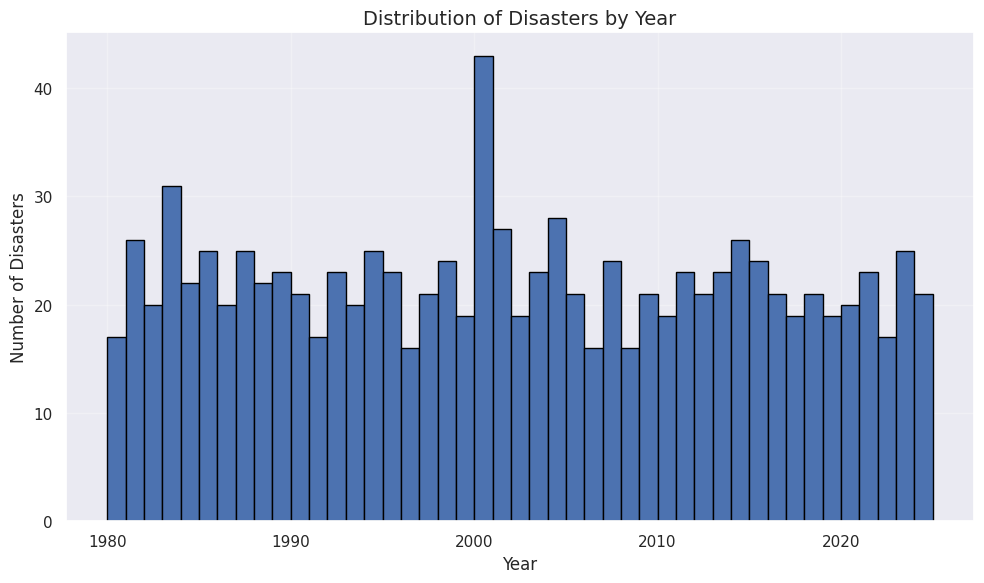

In [16]:
# 1. Plot Distribution of Disasters by Year (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=range(int(df['Year'].min()), int(df['Year'].max()) + 2), edgecolor='black')
plt.title('Distribution of Disasters by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()



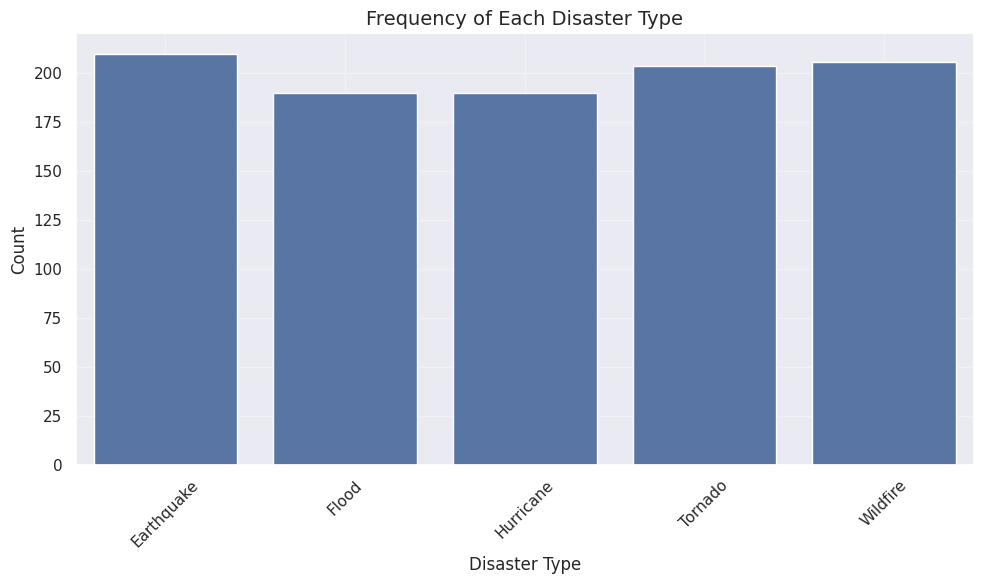

In [17]:
# 2. Plot Frequency of Each Disaster Type (Bar Plot)
plt.figure(figsize=(10, 6))
disaster_counts = df['Disaster_Type'].value_counts()
sns.barplot(x=disaster_counts.index, y=disaster_counts.values)
plt.title('Frequency of Each Disaster Type', fontsize=14)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()


<ipython-input-18-8010f5a2f535>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  economic_loss_by_type = df.groupby('Disaster_Type')['Economic_Loss_USD_Million'].mean().sort_values(ascending=False)


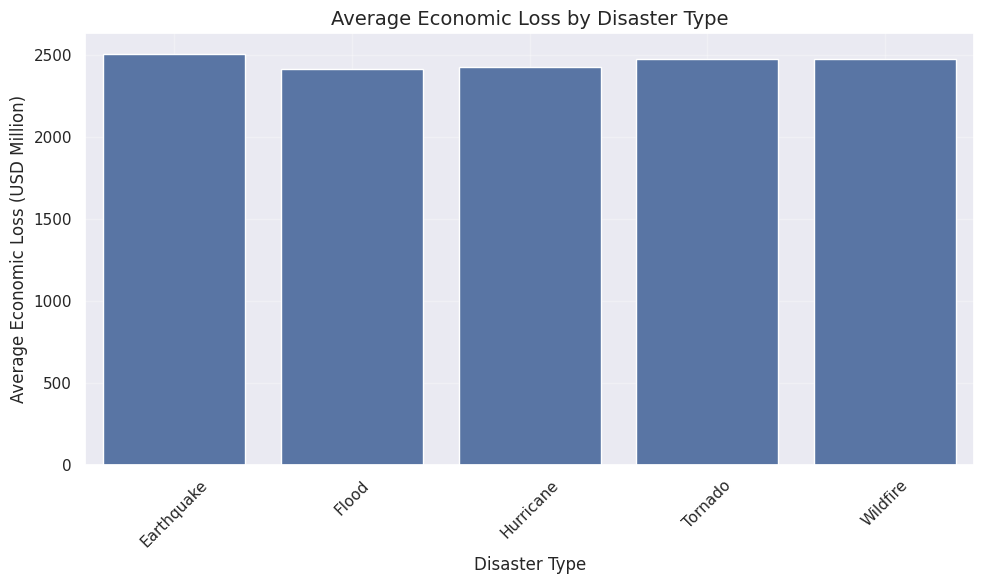

In [18]:
# 3. Plot Economic Loss vs Disaster Type (Bar Chart)
plt.figure(figsize=(10, 6))
economic_loss_by_type = df.groupby('Disaster_Type')['Economic_Loss_USD_Million'].mean().sort_values(ascending=False)
sns.barplot(x=economic_loss_by_type.index, y=economic_loss_by_type.values)
plt.title('Average Economic Loss by Disaster Type', fontsize=14)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Average Economic Loss (USD Million)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()


<ipython-input-19-313acf5d8d91>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fatalities_by_region = df.groupby('Region')['Fatalities'].mean().sort_values(ascending=False)


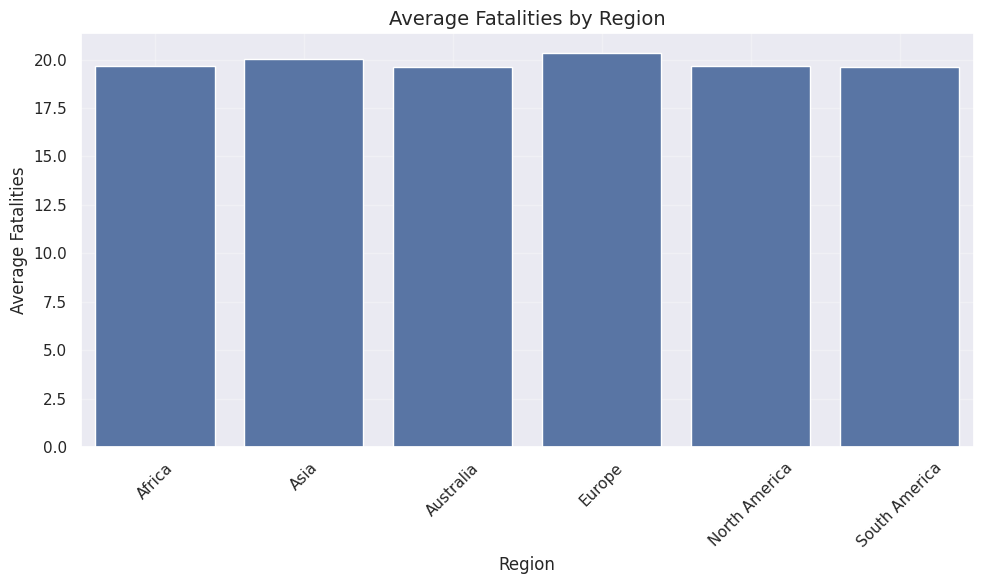

In [19]:
# 4. Plot Fatalities vs Region (Bar Plot)
plt.figure(figsize=(10, 6))
fatalities_by_region = df.groupby('Region')['Fatalities'].mean().sort_values(ascending=False)
sns.barplot(x=fatalities_by_region.index, y=fatalities_by_region.values)
plt.title('Average Fatalities by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Fatalities', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()



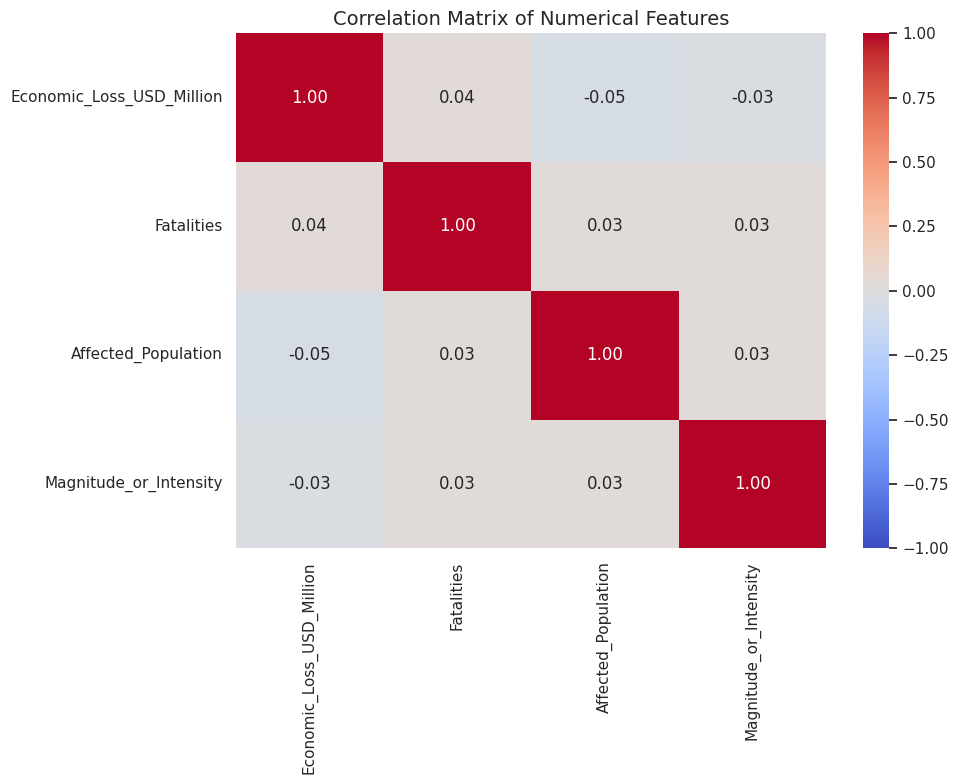

In [20]:
# 5. Correlation Matrix Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
numeric_cols = ['Economic_Loss_USD_Million', 'Fatalities', 'Affected_Population', 'Magnitude_or_Intensity']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()


Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Severity_Level
le = LabelEncoder()
df['Severity_Level'] = le.fit_transform(df['Severity_Level'])

# One-Hot Encoding for Disaster_Type and Region
df = pd.get_dummies(df, columns=['Disaster_Type', 'Region'], drop_first=True)

Feature Importance for Regression

<ipython-input-22-91daf013c5de>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reg_importances[:20], y=reg_importances.index[:20], palette='viridis')


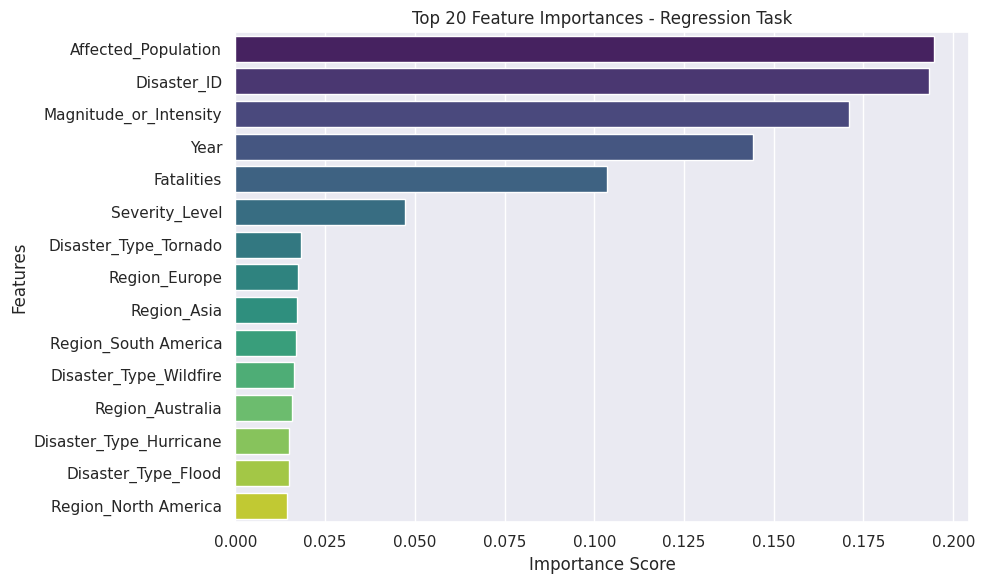

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Define X and y
X_reg = df.drop(columns=['Economic_Loss_USD_Million'])
y_reg = df['Economic_Loss_USD_Million']

# Train the model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_reg, y_reg)

# Get feature importances
reg_importances = pd.Series(reg_model.feature_importances_, index=X_reg.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=reg_importances[:20], y=reg_importances.index[:20], palette='viridis')
plt.title('Top 20 Feature Importances - Regression Task')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Feature Importance for Regression

<ipython-input-23-d4239805b946>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_importances[:20], y=clf_importances.index[:20], palette='magma')


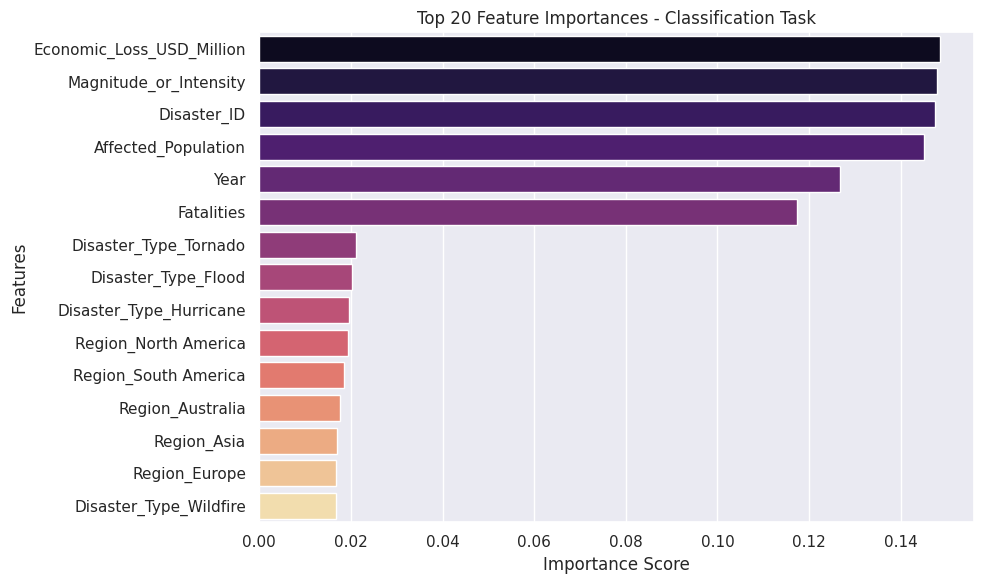

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define X and y
X_clf = df.drop(columns=['Severity_Level'])
y_clf = df['Severity_Level']

# Train the model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_clf, y_clf)

# Get feature importances
clf_importances = pd.Series(clf_model.feature_importances_, index=X_clf.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=clf_importances[:20], y=clf_importances.index[:20], palette='magma')
plt.title('Top 20 Feature Importances - Classification Task')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Machine Learning Modeling

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  # ***Corrected Line***
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBRegressor, XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Drop Disaster_ID
df = df.drop(columns=['Disaster_ID'])

In [26]:
#---Regression Task---
# Define columns (same as original)
numerical_cols = ['Year', 'Magnitude_or_Intensity', 'Fatalities', 'Affected_Population']
categorical_cols = ['Disaster_Type', 'Region']
target_col = 'Economic_Loss_USD_Million'

def prepare_regression_data(data, test_size=0.2, random_state=42, scale_numerical=True):

    # Separate features and target
    X = data[numerical_cols + categorical_cols + ['Severity_Level']]
    y = data[target_col]

    # Define preprocessing steps
    numerical_transformer = StandardScaler() if scale_numerical else 'passthrough'

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
            ('severity', OneHotEncoder(drop='first', sparse_output=False), ['Severity_Level'])
        ],
        remainder='drop'  # Explicitly drop any columns not specified
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Process data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed, y_train, y_test, preprocessor

In [27]:
# --- Classification Task ---
numerical_cols_classifier = numerical_cols + ['Economic_Loss_USD_Million']
def prepare_classification_data(data, test_size=0.2, random_state=42):
    X = data[numerical_cols_classifier + categorical_cols]
    y = data['Severity_Level']

    # Encode the target variable (Severity_Level)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols_classifier),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state
    )
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed, y_train, y_test, preprocessor, label_encoder


In [28]:
# --- Model Evaluation Functions ---
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Confusion Matrix': cm
    }


In [29]:
# --- Regression Modeling ---
def train_and_evaluate_regression(X_train, X_test, y_train, y_test):
    results = {}

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results['Linear Regression'] = evaluate_regression(y_test, y_pred_lr)

    # Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    results['Random Forest Regressor'] = evaluate_regression(y_test, y_pred_rf)

    # XGBoost Regressor
    xgb = XGBRegressor(random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    results['XGBoost Regressor'] = evaluate_regression(y_test, y_pred_xgb)

    # Hyperparameter Tuning for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }
    grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_rf.fit(X_train, y_train)
    y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test)
    results['Random Forest Regressor (Tuned)'] = evaluate_regression(y_test, y_pred_rf_tuned)
    results['Random Forest Best Params'] = grid_rf.best_params_

    # Hyperparameter Tuning for XGBoost
    param_grid_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    }
    grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_xgb.fit(X_train, y_train)
    y_pred_xgb_tuned = grid_xgb.best_estimator_.predict(X_test)
    results['XGBoost Regressor (Tuned)'] = evaluate_regression(y_test, y_pred_xgb_tuned)
    results['XGBoost Best Params'] = grid_xgb.best_params_

    return results

In [30]:
# --- Classification Modeling ---
def train_and_evaluate_classification(X_train, X_test, y_train, y_test):
    results = {}

    # Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    results['Random Forest Classifier'] = evaluate_classification(y_test, y_pred_rf)

    # XGBoost Classifier
    xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    results['XGBoost Classifier'] = evaluate_classification(y_test, y_pred_xgb)

    # Hyperparameter Tuning for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }
    grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
    grid_rf.fit(X_train, y_train)
    y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test)
    results['Random Forest Classifier (Tuned)'] = evaluate_classification(y_test, y_pred_rf_tuned)
    results['Random Forest Best Params'] = grid_rf.best_params_

    # Hyperparameter Tuning for XGBoost
    param_grid_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    }
    grid_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='mlogloss'),
                           param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
    grid_xgb.fit(X_train, y_train)
    y_pred_xgb_tuned = grid_xgb.best_estimator_.predict(X_test)
    results['XGBoost Classifier (Tuned)'] = evaluate_classification(y_test, y_pred_xgb_tuned)
    results['XGBoost Best Params'] = grid_xgb.best_params_

    return results

In [31]:
# --- Main Execution ---
def main():
    # Load dataset
    df = pd.read_csv('disaster_dataset.csv')

    # Handle missing values
    df = df.dropna()

    # Regression Task
    print("=== Regression Task: Predicting Economic_Loss_USD_Million ===")
    X_train_reg, X_test_reg, y_train_reg, y_test_reg, _ = prepare_regression_data(df)
    reg_results = train_and_evaluate_regression(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
    for model, metrics in reg_results.items():
        if 'Params' in model:
            print(f"\n{model}: {metrics}")
        else:
            print(f"\n{model}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")

    # Classification Task
    print("\n=== Classification Task: Predicting Severity_Level ===")
    X_train_clf, X_test_clf, y_train_clf, y_test_clf, _, label_encoder = prepare_classification_data(df)
    print("Severity_Level Classes:", label_encoder.classes_)
    clf_results = train_and_evaluate_classification(X_train_clf, X_test_clf, y_train_clf, y_test_clf)
    for model, metrics in clf_results.items():
        if 'Params' in model:
            print(f"\n{model}: {metrics}")
        else:
            print(f"\n{model}:")
            for metric, value in metrics.items():
                if metric == 'Confusion Matrix':
                    print(f"  {metric}:\n{value}")
                else:
                    print(f"  {metric}: {value:.4f}")

if __name__ == "__main__":
    main()

=== Regression Task: Predicting Economic_Loss_USD_Million ===

Linear Regression:
  MAE: 1191.0211
  RMSE: 1399.7520
  R2: -0.0015

Random Forest Regressor:
  MAE: 1245.4304
  RMSE: 1473.7847
  R2: -0.1102

XGBoost Regressor:
  MAE: 1384.0164
  RMSE: 1667.5052
  R2: -0.4213

Random Forest Regressor (Tuned):
  MAE: 1217.2108
  RMSE: 1439.1607
  R2: -0.0587

Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

XGBoost Regressor (Tuned):
  MAE: 1202.2897
  RMSE: 1403.7497
  R2: -0.0072

XGBoost Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

=== Classification Task: Predicting Severity_Level ===
Severity_Level Classes: ['High' 'Low' 'Moderate' 'Severe']

Random Forest Classifier:
  Accuracy: 0.2700
  Precision: 0.2663
  Recall: 0.2700
  F1: 0.2672
  Confusion Matrix:
[[18 15 13 10]
 [15 16  4 17]
 [14 15  7  9]
 [10 13 11 13]]

XGBoost Classifier:
  Accuracy: 0.2100
  Precision: 0.2098
  Recall: 0.2100
  F1: 0.2097
  Confusi

In [62]:
!pip install streamlit

In [63]:
!pip install pyngrok

In [64]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import os
from google.colab import drive
from google.colab import files

In [65]:
# Mount Google Drive (only if not already mounted)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define paths
drive_dataset_path = '/content/disaster_dataset.csv'
drive_model_dir = '/content/drive/MyDrive/disaster_models/'
if not os.path.exists(drive_model_dir):
    os.makedirs(drive_model_dir)

# --- Upload Dataset if not on Drive ---
if not os.path.exists(drive_dataset_path):
    print("Dataset not found at /content/disaster_dataset.csv. Please upload 'disaster_dataset.csv'.")
    uploaded = files.upload()
    if 'disaster_dataset.csv' not in uploaded:
        raise FileNotFoundError("Dataset 'disaster_dataset.csv' not uploaded. Please upload the file and try again.")
    # Save the uploaded dataset to /content/
    with open(drive_dataset_path, 'wb') as f:
        f.write(uploaded['disaster_dataset.csv'])



In [66]:
# --- Train and Save Models ---
def train_and_save_models():
    try:
        # ***Corrected Section Start***: Add detailed logging and error handling
        # Step 1: Load dataset
        print(f"Step 1: Attempting to load dataset from {drive_dataset_path}...")
        if not os.path.exists(drive_dataset_path):
            raise FileNotFoundError(f"Dataset not found at {drive_dataset_path}. Please ensure the dataset is uploaded.")
        df = pd.read_csv(drive_dataset_path)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        if df.empty:
            raise ValueError("Dataset is empty. Please provide a valid dataset.")
        if df.shape[0] == 0:
            raise ValueError("Dataset has no rows. Please provide a valid dataset.")
        df = df.dropna()
        print(f"Dataset shape after dropping NaN values: {df.shape}")
        if df.shape[0] == 0:
            raise ValueError("Dataset is empty after dropping NaN values. Please provide a dataset with valid data.")

        # Step 2: Verify required columns exist
        print("Step 2: Checking for required columns in the dataset...")
        required_cols = numerical_cols + categorical_cols + [target_col, 'Severity_Level']
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            raise ValueError(f"Dataset missing required columns: {missing_cols}")
        print("All required columns are present in the dataset.")

        # Step 3: Verify data types and non-null values
        print("Step 3: Checking data types and non-null values...")
        for col in numerical_cols + [target_col]:
            if not pd.api.types.is_numeric_dtype(df[col]):
                raise ValueError(f"Column {col} must be numeric, but found type {df[col].dtype}")
            if df[col].isnull().any():
                raise ValueError(f"Column {col} contains null values after dropna()")
        for col in categorical_cols + ['Severity_Level']:
            if not pd.api.types.is_object_dtype(df[col]) and not pd.api.types.is_categorical_dtype(df[col]):
                raise ValueError(f"Column {col} must be categorical or object type, but found type {df[col].dtype}")
            if df[col].isnull().any():
                raise ValueError(f"Column {col} contains null values after dropna()")
        print("Data types and non-null checks passed successfully.")
        print("Dataset dtypes:\n", df.dtypes)
        print("First few rows of the dataset:\n", df.head())

        # Step 4: Regression
        print("Step 4: Training regression model...")
        X_train_reg, _, y_train_reg, _, reg_preprocessor = prepare_regression_data(df)
        print(f"Regression training data shape: {X_train_reg.shape}")
        reg_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
        print("Fitting regression model...")
        reg_model.fit(X_train_reg, y_train_reg)
        print("Regression model trained successfully.")
        reg_model_path = os.path.join(drive_model_dir, 'reg_model.joblib')  # Save to Drive
        print(f"Saving regression model to {reg_model_path}...")
        joblib.dump(reg_model, reg_model_path)
        if not os.path.exists(reg_model_path):
            raise RuntimeError(f"Failed to save regression model to {reg_model_path}")
        reg_preprocessor_path = os.path.join(drive_model_dir, 'reg_preprocessor.joblib')
        print(f"Saving regression preprocessor to {reg_preprocessor_path}...")
        joblib.dump(reg_preprocessor, reg_preprocessor_path)
        if not os.path.exists(reg_preprocessor_path):
            raise RuntimeError(f"Failed to save regression preprocessor to {reg_preprocessor_path}")
        print("Regression model and preprocessor saved successfully.")

        # Step 5: Classification
        print("Step 5: Training classification model...")
        X_train_clf, _, y_train_clf, _, clf_preprocessor, label_encoder = prepare_classification_data(df)
        print(f"Classification training data shape: {X_train_clf.shape}")
        clf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
        print("Fitting classification model...")
        clf_model.fit(X_train_clf, y_train_clf)
        print("Classification model trained successfully.")
        clf_model_path = os.path.join(drive_model_dir, 'clf_model.joblib')
        print(f"Saving classification model to {clf_model_path}...")
        joblib.dump(clf_model, clf_model_path)
        if not os.path.exists(clf_model_path):
            raise RuntimeError(f"Failed to save classification model to {clf_model_path}")
        clf_preprocessor_path = os.path.join(drive_model_dir, 'clf_preprocessor.joblib')
        print(f"Saving classification preprocessor to {clf_preprocessor_path}...")
        joblib.dump(clf_preprocessor, clf_preprocessor_path)
        if not os.path.exists(clf_preprocessor_path):
            raise RuntimeError(f"Failed to save classification preprocessor to {clf_preprocessor_path}")
        label_encoder_path = os.path.join(drive_model_dir, 'label_encoder.joblib')
        print(f"Saving label encoder to {label_encoder_path}...")
        joblib.dump(label_encoder, label_encoder_path)
        if not os.path.exists(label_encoder_path):
            raise RuntimeError(f"Failed to save label encoder to {label_encoder_path}")
        print("Classification model, preprocessor, and label encoder saved successfully.")

        print("Step 6: All models trained and saved successfully to Google Drive at", drive_model_dir)
        # ***Corrected Section End***
    except Exception as e:
        print(f"Error during model training: {str(e)}")
        raise


In [67]:
# --- Load Models and Preprocessors ---
def load_models():
    model_files = [
        os.path.join(drive_model_dir, 'reg_model.joblib'),
        os.path.join(drive_model_dir, 'reg_preprocessor.joblib'),
        os.path.join(drive_model_dir, 'clf_model.joblib'),
        os.path.join(drive_model_dir, 'clf_preprocessor.joblib'),
        os.path.join(drive_model_dir, 'label_encoder.joblib')
    ]
    if not all(os.path.exists(f) for f in model_files):
        print("Model files not found on Google Drive. Training models now...")
        train_and_save_models()
    reg_model = joblib.load(model_files[0])
    reg_preprocessor = joblib.load(model_files[1])
    clf_model = joblib.load(model_files[2])
    clf_preprocessor = joblib.load(model_files[3])
    label_encoder = joblib.load(model_files[4])
    return reg_model, reg_preprocessor, clf_model, clf_preprocessor, label_encoder

# Ensure we're running in a Colab environment
try:
    from IPython import get_ipython
    if 'google.colab' not in str(get_ipython()):
        raise RuntimeError("This script must be run in Google Colab.")
    print("Confirmed: Running in Google Colab environment.")
except ImportError:
    raise RuntimeError("This script must be run in Google Colab.")

# Define model paths
drive_model_dir = '/content/drive/MyDrive/disaster_models/'
model_files = [
    os.path.join(drive_model_dir, 'reg_model.joblib'),
    os.path.join(drive_model_dir, 'reg_preprocessor.joblib'),
    os.path.join(drive_model_dir, 'clf_model.joblib'),
    os.path.join(drive_model_dir, 'clf_preprocessor.joblib'),
    os.path.join(drive_model_dir, 'label_encoder.joblib')
]

# Check if model files exist; if not, train and save them
if not all(os.path.exists(f) for f in model_files):
    print("Model files not found on Google Drive. Training models now...")
    try:
        train_and_save_models()
    except Exception as e:
        print(f"Failed to train models: {str(e)}")
        raise


Confirmed: Running in Google Colab environment.
Model files not found on Google Drive. Training models now...
Step 1: Attempting to load dataset from /content/disaster_dataset.csv...
Dataset loaded successfully. Shape: (1000, 9)
Dataset shape after dropping NaN values: (1000, 9)
Step 2: Checking for required columns in the dataset...
All required columns are present in the dataset.
Step 3: Checking data types and non-null values...
Data types and non-null checks passed successfully.
Dataset dtypes:
 Disaster_ID                    int64
Disaster_Type                 object
Region                        object
Year                           int64
Severity_Level                object
Magnitude_or_Intensity       float64
Economic_Loss_USD_Million    float64
Fatalities                     int64
Affected_Population            int64
dtype: object
First few rows of the dataset:
    Disaster_ID Disaster_Type  Region  Year Severity_Level  \
0            1      Wildfire    Asia  1987       Modera

In [46]:
# --- Load Models and Preprocessors ---
def load_models():
    if not all(os.path.exists(f) for f in ['/content/reg_model.joblib', '/content/reg_preprocessor.joblib', '/content/clf_model.joblib', '/content/clf_preprocessor.joblib', '/content/label_encoder.joblib']):
        train_and_save_models()
    reg_model = joblib.load('/content/reg_model.joblib')
    reg_preprocessor = joblib.load('/content/reg_preprocessor.joblib')
    clf_model = joblib.load('/content/clf_model.joblib')
    clf_preprocessor = joblib.load('/content/clf_preprocessor.joblib')
    label_encoder = joblib.load('/content/label_encoder.joblib')
    return reg_model, reg_preprocessor, clf_model, clf_preprocessor, label_encoder

Deployment or Dashboard (Optional)

In [68]:
# Manually write dashboard.py without %%writefile
dashboard_code = """\
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Define paths for model files on Google Drive
drive_model_dir = '/content/drive/MyDrive/disaster_models/'

# Load models and preprocessors
reg_model = joblib.load(drive_model_dir + 'reg_model.joblib')
reg_preprocessor = joblib.load(drive_model_dir + 'reg_preprocessor.joblib')
clf_model = joblib.load(drive_model_dir + 'clf_model.joblib')
clf_preprocessor = joblib.load(drive_model_dir + 'clf_preprocessor.joblib')
label_encoder = joblib.load(drive_model_dir + 'label_encoder.joblib')

st.title("Disaster Impact Prediction Dashboard")
st.markdown("Enter disaster details to predict **Economic Loss (USD Million)** and **Severity Level**.")

# Input form
with st.form("disaster_form"):
    st.header("Input Disaster Details")
    year = st.number_input("Year", min_value=1980, max_value=2025, value=2020)
    magnitude = st.number_input("Magnitude/Intensity", min_value=0.0, value=5.0)
    fatalities = st.number_input("Fatalities", min_value=0, value=0)
    affected_population = st.number_input("Affected Population", min_value=0, value=0)
    economic_loss = st.number_input("Economic Loss (USD Million, for Severity Prediction)", min_value=0.0, value=0.0)
    disaster_type = st.selectbox("Disaster Type", ['Hurricane', 'Wildfire', 'Flood', 'Earthquake', 'Other'])
    region = st.selectbox("Region", ['North America', 'Australia', 'Asia', 'Europe', 'South America', 'Africa'])
    severity_level = st.selectbox("Severity Level (for Economic Loss Prediction)", ['Low', 'Moderate', 'High', 'Severe'])
    submit_button = st.form_submit_button("Predict")

# Prediction logic
if submit_button:
    # Prepare regression input
    reg_input = pd.DataFrame({
        'Year': [year],
        'Magnitude_or_Intensity': [magnitude],
        'Fatalities': [fatalities],
        'Affected_Population': [affected_population],
        'Disaster_Type': [disaster_type],
        'Region': [region],
        'Severity_Level': [severity_level]
    })
    reg_input_processed = reg_preprocessor.transform(reg_input)
    reg_prediction = reg_model.predict(reg_input_processed)[0]

    # Prepare classification input
    clf_input = pd.DataFrame({
        'Year': [year],
        'Magnitude_or_Intensity': [magnitude],
        'Fatalities': [fatalities],
        'Affected_Population': [affected_population],
        'Economic_Loss_USD_Million': [economic_loss],
        'Disaster_Type': [disaster_type],
        'Region': [region]
    })
    clf_input_processed = clf_preprocessor.transform(clf_input)
    clf_prediction = clf_model.predict(clf_input_processed)[0]
    clf_prediction_label = label_encoder.inverse_transform([clf_prediction])[0]

    # Display predictions
    st.header("Prediction Results")
    st.write(f"**Predicted Economic Loss**: ${reg_prediction:,.2f} Million USD")
    st.write(f"**Predicted Severity Level**: {clf_prediction_label}")

    # Simple visualization
    st.header("Prediction Summary")
    st.bar_chart({
        "Economic Loss ($M)": [reg_prediction],
        "Severity Score (Encoded)": [clf_prediction]
    })

st.markdown("---")
st.markdown("Built with Streamlit | Models: Random Forest | Data: Disaster Dataset")
"""
with open("dashboard.py", "w") as f:
    f.write(dashboard_code)
print("dashboard.py written successfully using manual file I/O.")


dashboard.py written successfully using manual file I/O.


APP

In [69]:
# --- Run Streamlit with ngrok ---
from pyngrok import ngrok
import subprocess

# Kill any existing ngrok processes to avoid tunnel limit error
!pkill ngrok

# Set up ngrok with your valid authtoken
# Replace with a new authtoken from https://dashboard.ngrok.com/get-started/your-authtoken after verifying your account
!ngrok authtoken 2wOMZK76mTel1Qs3meFVJ0BkOEt_647xLyLA2cRFnrkvxWaKY

# Start a new tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit app running at: {public_url}")

# Run Streamlit in the background
subprocess.Popen(["streamlit", "run", "dashboard.py", "--server.port", "8501"])



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app running at: NgrokTunnel: "https://96b6-34-23-8-133.ngrok-free.app" -> "http://localhost:8501"


<Popen: returncode: None args: ['streamlit', 'run', 'dashboard.py', '--serve...>

In [70]:
from google.colab import files

# Download the notebook (if needed)
# files.download('/content/Disaster_Impact_EDA.ipynb')

# Download the dashboard script
files.download('/content/dashboard.py')

# Download the dataset
files.download('/content/disaster_dataset.csv')

# Download model files (adjust paths as needed)
for file in ['reg_model.joblib', 'reg_preprocessor.joblib', 'clf_model.joblib', 'clf_preprocessor.joblib', 'label_encoder.joblib']:
    files.download(f'/content/drive/MyDrive/disaster_models/{file}')

# Download visualizations (adjust filenames as needed)
for viz in ['distributions.png', 'correlation_heatmap.png']:
    files.download(f'/content/{viz}')

# Generate and download requirements.txt if not already done
requirements = """\
streamlit==1.38.0
pandas==2.2.2
numpy==1.26.4
scikit-learn==1.5.1
xgboost==2.1.1
joblib==1.4.2
matplotlib==3.8.4
seaborn==0.13.2
"""
with open("requirements.txt", "w") as f:
    f.write(requirements)
files.download('/content/requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: /content/distributions.png